In [1]:
%pylab inline
from wallet.util.analysis import Analysis
categories = ['Industries']
previous = ['ITB','IXN','CIBR']
ana = Analysis.from_funds(50, categories=categories, additions=previous)
print(ana)
ana.screen().head(20)

Populating the interactive namespace from numpy and matplotlib
from 2019-09-13 to 2019-11-29 - 63 symbols


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
Symbols,,,,,,,,,,,,
IXJ,50.0,0.174132,0.289353,-0.571861,0.011168,0.218780,0.370905,0.672476,0.574371,9.442900,4.288247,-0.553370
IXN,50.0,0.164305,0.303756,-0.593591,-0.061400,0.224999,0.343648,0.983326,0.514784,8.696351,3.695955,-0.127478
XLV,50.0,0.171520,0.321256,-0.587924,-0.059872,0.186355,0.458305,0.766953,0.509199,9.171917,4.402177,-0.358267
XLK,50.0,0.162145,0.308934,-0.597833,-0.072523,0.250535,0.339774,0.914968,0.499164,8.963358,3.604371,-0.224599
VGT,50.0,0.161514,0.313861,-0.608990,-0.044954,0.253866,0.337016,0.901201,0.489318,8.973584,3.795380,-0.285930
FTEC,50.0,0.161191,0.313864,-0.616488,-0.052906,0.249917,0.342653,0.906979,0.488282,8.971894,3.780178,-0.264294
IYW,50.0,0.159549,0.313286,-0.694445,-0.071096,0.242934,0.368743,0.927340,0.483941,8.678211,4.201884,-0.346697
IYH,50.0,0.171549,0.338958,-0.665991,-0.052811,0.197595,0.475990,0.749902,0.482691,9.202582,4.826993,-0.519330
FXH,50.0,0.187860,0.376425,-0.746936,-0.028136,0.260744,0.483430,0.773318,0.477981,10.435222,5.833665,-0.746867


In [2]:
print(ana)
ratios, choices = ana.optimize_iteration(3, additions=previous)
ratios

from 2019-09-13 to 2019-11-29 - 48 symbols


[(0.3041, {'SOXX': 1}),
 (0.4518, {'IBB': 0.382, 'XT': 0.618}),
 (0.452, {'SOXX': 0.3211, 'IBB': 0.6789}),
 (0.4821, {'FXH': 0.7261, 'XT': 0.2739}),
 (0.4993, {'HACK': 0.3929, 'FXH': 0.3384, 'VHT': 0.2687}),
 (0.5076, {'IYH': 0.622, 'HACK': 0.378}),
 (0.5343, {'IYW': 0.5465, 'FHLC': 0.4535}),
 (0.5427, {'IYW': 0.4368, 'IGF': 0.2483, 'FHLC': 0.3149}),
 (0.5538, {'IYH': 0.3255, 'IGF': 0.2375, 'VGT': 0.437}),
 (0.5699, {'VDC': 0.2765, 'XLV': 0.38, 'FTEC': 0.3435}),
 (0.5797, {'XLP': 0.4274, 'VGT': 0.3337, 'VHT': 0.239}),
 (0.6107, {'IXN': 0.3814, 'IXJ': 0.6186}),
 (0.622, {'IXJ': 0.4333, 'XLP': 0.3163, 'XLK': 0.2505}),
 (0.7387, {'ITB': 0.4804, 'CIBR': 0.2976, 'XLK': 0.222}),
 (0.7455, {'IXN': 0.2528, 'CIBR': 0.2827, 'ITB': 0.4645})]

{'IXN': 13, 'CIBR': 14, 'ITB': 23, 'IXJ': 22, 'XLP': 16, 'XLK': 13}


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
Portfolio,50.0,0.140998,0.182947,-0.423155,0.027917,0.157216,0.280901,0.542525,0.727323,7.634016,2.334044,-0.616581
IXJ,50.0,0.174132,0.289353,-0.571861,0.011168,0.218780,0.370905,0.672476,0.574371,9.442900,4.288247,-0.553370
IXN,50.0,0.164305,0.303756,-0.593591,-0.061400,0.224999,0.343648,0.983326,0.514784,8.696351,3.695955,-0.127478
XLK,50.0,0.162145,0.308934,-0.597833,-0.072523,0.250535,0.339774,0.914968,0.499164,8.963358,3.604371,-0.224599
ITB,50.0,0.146475,0.330612,-0.707016,-0.074290,0.124731,0.359514,0.926221,0.419038,7.916022,4.083426,0.053818
CIBR,50.0,0.150279,0.368176,-0.670910,-0.088796,0.227665,0.458689,0.811734,0.386615,8.347760,4.843037,-0.594576
XLP,50.0,0.041577,0.159880,-0.309169,-0.092085,0.036190,0.152686,0.320776,0.210410,2.173656,2.263106,-0.199975


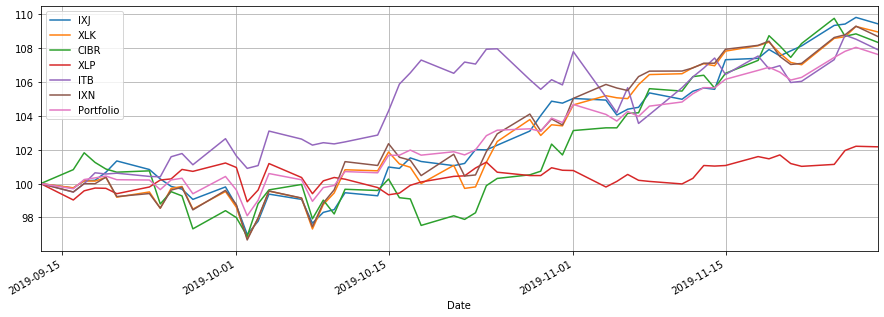

In [3]:
print(choices)
ana.graph(choices[0])